In [253]:
import pandas as pd
import sqlalchemy as sa

engine = sa.create_engine(open(r"S:\Data Science\sandboxes\Jawad\patient_LOS_project\SQL_query\connection_engine.txt").read())

with engine.connect() as conn:
   initial_emerg_df = pd.read_sql(open(r"S:\Data Science\sandboxes\Jawad\patient_LOS_project\SQL_query\emergency_sql_queries\emerg_main_Los.sql").read(), con=conn.connection)

<>:4: SyntaxWarning:

invalid escape sequence '\D'

<>:7: SyntaxWarning:

invalid escape sequence '\D'

<>:4: SyntaxWarning:

invalid escape sequence '\D'

<>:7: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_22924\335685875.py:4: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_22924\335685875.py:7: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_22924\335685875.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [328]:
df_emerg = initial_emerg_df.copy()

In [329]:
len(df_emerg)

12910

In [330]:
df_emerg.isna().sum()

admission_datetime          0
weekend                     0
time_of_day                 0
month                       0
Los                         0
WardAdmission               0
acuity                    361
AdmissionMethod             0
SourceOfAdmission           0
EthnicCategory            762
AgeOnAdmission              0
StartSexofPatientsCode      0
PrimaryDiagnosisICD         0
Description                 0
Chapter_Number              0
Chapter_Description         0
IMD_Decile                  0
dtype: int64

In [331]:
df_emerg_unique = df_emerg.drop_duplicates(subset=['admission_datetime', 'Los', 'AgeOnAdmission']).copy()

In [332]:
len(df_emerg_unique)

6743

Check number of null values in each row

In [260]:
df_emerg_unique.isna().sum() 

admission_datetime          0
weekend                     0
time_of_day                 0
month                       0
Los                         0
WardAdmission               0
acuity                    141
AdmissionMethod             0
SourceOfAdmission           0
EthnicCategory            547
AgeOnAdmission              0
StartSexofPatientsCode      0
PrimaryDiagnosisICD         0
Description                 0
Chapter_Number              0
Chapter_Description         0
IMD_Decile                  0
dtype: int64

Checking Number of male and female in dataset, 1 = Male while 2 = female

In [274]:
df_emerg_unique['StartSexofPatientsCode'].value_counts() 

StartSexofPatientsCode
1    4339
2    2404
Name: count, dtype: int64

<Axes: xlabel='Los', ylabel='Count'>

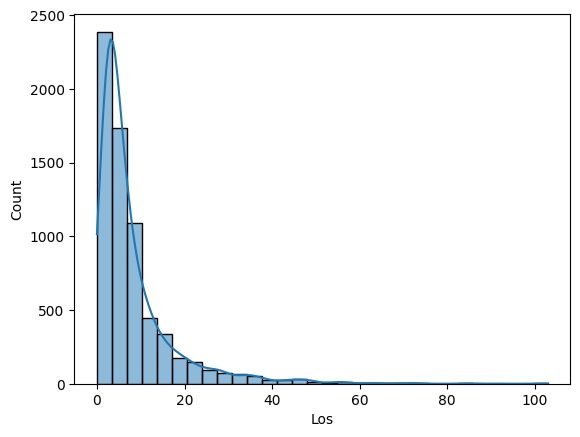

In [333]:
import seaborn as sns
sns.histplot(df_emerg_unique['Los'], bins=30, kde=True) # Length of stay distribution 

In [334]:
import plotly.express as px

# Define bins and labels
bins = [0, 1, 2, 5, 10, 20, 30, 40, 60, 80, float('inf')]
labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-40', '40-60', '60-80', '>80']

# Apply binning
df_emerg_unique['Los_Bin'] = pd.cut(df_emerg_unique['Los'], bins=bins, labels=labels, right=False)

# Count patients per bin
bin_counts = df_emerg_unique['Los_Bin'].value_counts().sort_index()


fig1 = px.bar(
    x=bin_counts.index,
    y=bin_counts.values,
    labels={'x': 'Length of Stay (Days)', 'y': 'Number of Patients'},
    title='Distribution of Length of Stay (LoS) Bins - Emergency Admissions'
)

fig1.show()


In [335]:
# Extract month from datetime
df_emerg_unique['year_month'] = df_emerg_unique['admission_datetime'].dt.strftime('%Y-%m') # A dummy column to show year and month combined

# Group by month and calculate average LOS
monthly_avg_los = df_emerg_unique.groupby('year_month')['Los'].mean().reset_index()
monthly_avg_los1 = df_emerg_unique.groupby('year_month')['Los'].median().reset_index()

In [336]:
import pandas as pd
import plotly.graph_objects as go


# Create the plot
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=monthly_avg_los['year_month'],
        y=monthly_avg_los['Los'],
        mode='lines+markers',
        name='Average LOS mean',
        line=go.scatter.Line(shape='spline')
    )
)
fig.add_trace(
    go.Scatter(
        x=monthly_avg_los1['year_month'],
        y=monthly_avg_los1['Los'],
        mode='lines+markers',
        name='Average LOS median',
        line=go.scatter.Line(shape='spline')
    )
)


# Update layout
fig.update_layout(
    title='Average LOS Per Month (2020–2024) - Emergency',
    xaxis_title='Month',
    yaxis_title='Length of Stay (Days)',
    template='plotly_white',
    margin=dict(l=20, r=20, t=40, b=40),
    xaxis=dict(tickangle=50)
)

fig.show()


<Axes: ylabel='Frequency'>

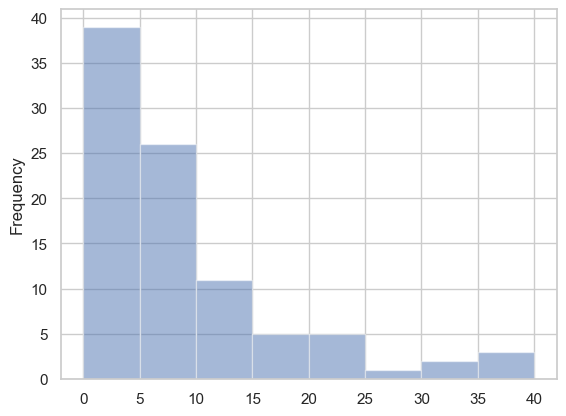

In [1119]:
bins = [*range(0, 45, 5)]
#df_emerg.query("year_month == '2023-08'")['Los'].plot.hist(alpha=0.5, bins=bins)
df_emerg_unique[df_emerg_unique['year_month'] == '2023-01']['Los'].plot.hist(alpha=0.5, bins=bins)


In [342]:
import plotly.graph_objects as go

monthly_avg_acuity = df_emerg_unique.groupby(['year_month', 'acuity'])['Los'].mean().reset_index()

methods = monthly_avg_acuity['acuity'].unique()

# Create a trace for each method
traces = [
    go.Scatter(
        x=monthly_avg_acuity[monthly_avg_acuity['acuity'] == method]['year_month'],
        y=monthly_avg_acuity[monthly_avg_acuity['acuity'] == method]['Los'],
        mode='lines+markers',
        name=str(method),
        line=go.scatter.Line(shape='spline')
    )
    for method in methods
]

# Assemble the figure
fig = go.Figure(data=traces)
fig.update_layout(
    title='Average LOS by Time of the Day Per Month',
    xaxis_title='Month',
    yaxis_title='Length of Stay (Days)',
    template='plotly_white',
    legend_title='Acuity',
    margin=dict(l=40, r=20, t=40, b=40)
)

fig.show()


In [347]:
import plotly.graph_objects as go

label_map = {0: 'Weekday', 1: 'Weekend'}
monthly_avg_week_weekend = df_emerg_unique.groupby(['year_month', 'weekend'])['Los'].mean().reset_index()
monthly_avg_week_weekend['weekend_label'] = monthly_avg_week_weekend['weekend'].map(label_map)

methods = monthly_avg_week_weekend['weekend_label'].unique()

# Create a trace for each label
traces = [
    go.Scatter(
        x=monthly_avg_week_weekend[monthly_avg_week_weekend['weekend_label'] == method]['year_month'],
        y=monthly_avg_week_weekend[monthly_avg_week_weekend['weekend_label'] == method]['Los'],
        mode='lines+markers',
        name=method,
        line=go.scatter.Line(shape='spline')
    )
    for method in methods
]

# Assemble the figure
fig = go.Figure(data=traces)
fig.update_layout(
    title='Average LOS by Weekday vs Weekend Per Month',
    xaxis_title='Month',
    yaxis_title='Length of Stay (Days)',
    template='plotly_white',
    legend_title='Admission Type',
    margin=dict(l=40, r=20, t=40, b=40)
)

fig.show()


In [367]:
df_model_los = df_emerg_unique.copy()

In [368]:
df_encoded = df_model_los.copy()

df_encoded = df_encoded.drop(columns=['admission_datetime', 'Description', 'Chapter_Description', 'year_month', 'Los_Bin'])

# Ordinal encoding
ordinal_cols = ['time_of_day', 'month', 'acuity', 'IMD_Decile']
df_encoded[ordinal_cols] = df_encoded[ordinal_cols].astype('category').apply(lambda x: x.cat.codes)

# Label encoding for binary
binary_cols = ['weekend', 'StartSexofPatientsCode']
df_encoded[binary_cols] = df_encoded[binary_cols].astype(int)


target = 'Los'
categorical_cols = ['PrimaryDiagnosisICD', 'WardAdmission', 'AdmissionMethod', 'SourceOfAdmission', 'EthnicCategory', 'Chapter_Number']

# Apply target encoding
for col in categorical_cols:
    target_map = df_encoded.groupby(col)[target].mean().to_dict()
    df_encoded[col + '_target'] = df_encoded[col].map(target_map)

# Drop original string columns
df_encoded.drop(columns=categorical_cols, inplace=True)

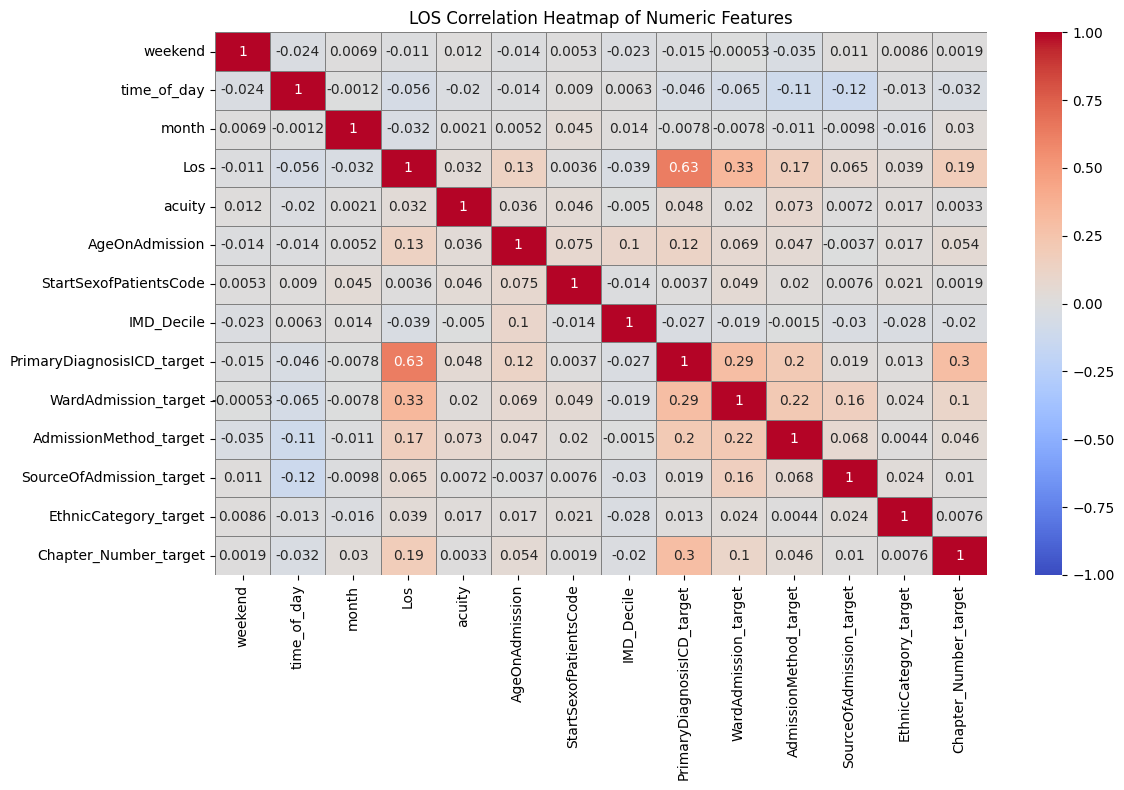

In [369]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.5,
    linecolor='gray'
)
plt.title('LOS Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


In [370]:
import pandas as pd

# Group by 'WardAdmission' and calculate the mean of 'Los'
mean_los = df_model_los.groupby('WardAdmission')['Los'].mean().reset_index(name='Mean_Los')

# Count the number of entries for each 'WardAdmission'
entry_counts = df_model_los['WardAdmission'].value_counts().reset_index()
entry_counts.columns = ['WardAdmission', 'Total_Entries']

# Merge the two DataFrames on 'WardAdmission'
summary_df = pd.merge(mean_los, entry_counts, on='WardAdmission')

# Display the resulting DataFrame
print(summary_df)


                   WardAdmission    Mean_Los  Total_Entries
0                 AMU-Barrington    8.683440           1093
1             Acute Medical Unit    9.338154           2697
2      Ambulatory Emergency Care    8.376147            109
3                Barrington Ward   14.590698            215
4                     Blake Ward   15.200000              5
5   Cardiac Catheter Laboratory     2.083682            239
6            Coleridge Resp Unit   17.000000              1
7             Conservators Ward    17.000000              1
8            Coronary Care Unit     5.088766           1994
9           Dunkery Stroke Neuro    6.000000              4
10                 Dunkery Ward    17.400000              5
11                  Exmoor Ward    20.333333              3
12                Fielding Ward    11.270968            155
13                   Gen Th PACU   13.000000              2
14              Hestercombe Ward   10.272727             22
15          High Dependency Unit   17.00

In [371]:
df_model_los =  df_model_los.drop(columns=['admission_datetime', 'Description', 'Chapter_Description', 'year_month', 'Los_Bin'])

Linear Regression Model:

In [948]:
LR_model_df = df_model_los.copy()

In [950]:
LR_model_df['acuity'] = LR_model_df['acuity'].fillna(LR_model_df['acuity'].mode()[0])
LR_model_df['EthnicCategory'] = LR_model_df['EthnicCategory'].fillna(LR_model_df['EthnicCategory'].mode()[0])

In [1029]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define features and target
X = LR_model_df.drop(columns='Los')
y = LR_model_df['Los']

# column seperation
categorical_cols = ['weekend', 'time_of_day', 'acuity','StartSexofPatientsCode']
high_cardinality_cols = ['WardAdmission', 'EthnicCategory', 'month', 'AdmissionMethod', 'SourceOfAdmission', 'PrimaryDiagnosisICD', 'Chapter_Number', 'IMD_Decile']
numerical_cols = ['AgeOnAdmission']


#Target encoding ICD code
for col in high_cardinality_cols:
    X[col] = LR_model_df.groupby(col)['Los'].transform('mean')


# One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'  # Keep numerical and target-encoded columns
)

# Model and preprocessing are warped in a pipeline
LR_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(LR_pipeline, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')


print("Cross-validated MAE scores:", -cv_scores)
print(f"Mean MEA score: {np.mean(-cv_scores):.2f}")

Cross-validated MAE scores: [4.31982826 4.7864856  4.32771813 4.40492229 4.64257728]
Mean MEA score: 4.50


In [1068]:
# Train model
LR_pipeline.fit(X_train, y_train)

# Predict on testing data
Lg_y_pred = LR_pipeline.predict(X_test)

# Evaluate on testing data
Lg_test_mae = mean_absolute_error(y_test, Lg_y_pred)
Lg_test_rmse = np.sqrt(mean_squared_error(y_test, Lg_y_pred))
Lg_test_r2 = r2_score(y_test, Lg_y_pred)

print("\nTesting Set:")
print(f"MAE: {Lg_test_mae:.2f}")
print(f"RMSE: {Lg_test_rmse:.2f}")
print(f"R² Score: {Lg_test_r2:.2f}")


Testing Set:
MAE: 4.41
RMSE: 7.02
R² Score: 0.47


In [1026]:
print(f"Actual LOS mean: {y_test.mean():.2f}")
print(f"Predicted LOS mean: {Lg_y_pred.mean():.2f}")

Actual LOS mean: 8.05
Predicted LOS mean: 8.19


In [1092]:
print(f"Actual LOS total days: {y_test.sum():.2f}")
print(f"Predicted LOS total days: {Lg_y_pred.sum():.2f}")

Actual LOS total days: 10854.00
Predicted LOS total days: 11050.61


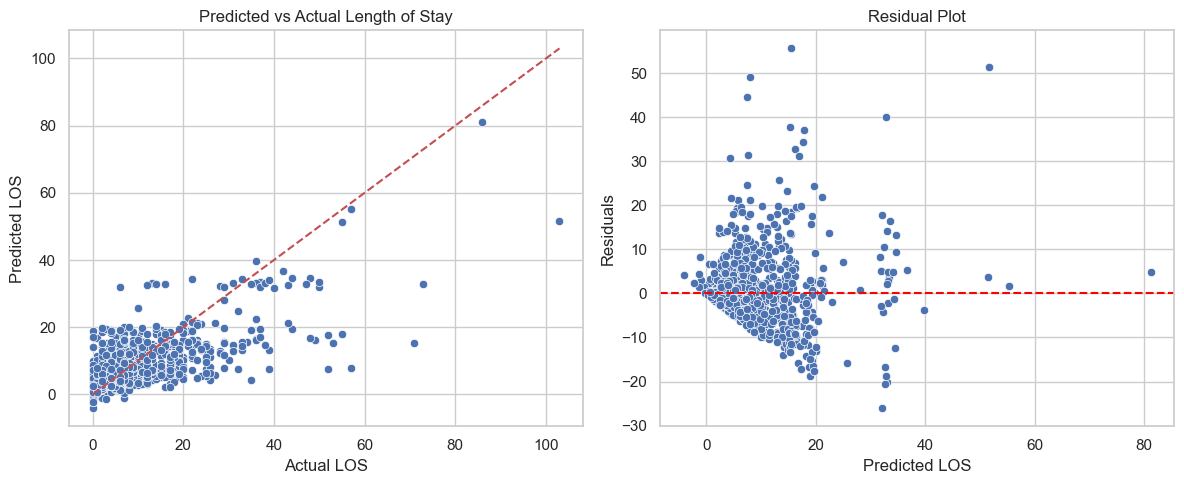

In [958]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - Lg_y_pred

# Create horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Predicted vs Actual
sns.scatterplot(x=y_test, y=Lg_y_pred, ax=axes[0])
axes[0].set_xlabel("Actual LOS")
axes[0].set_ylabel("Predicted LOS")
axes[0].set_title("Predicted vs Actual Length of Stay")
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Plot 2: Residual Plot
sns.scatterplot(x=Lg_y_pred, y=residuals, ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel("Predicted LOS")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residual Plot")

plt.tight_layout()
plt.show()


XGBoosting Regression:

In [980]:
xgb_model_df = df_model_los.copy()

In [981]:
xgb_model_df['acuity'] = xgb_model_df['acuity'].fillna(xgb_model_df['acuity'].mode()[0])
xgb_model_df['EthnicCategory'] = xgb_model_df['EthnicCategory'].fillna(xgb_model_df['EthnicCategory'].mode()[0])

In [1005]:
# Import necessary libraries
import optuna
import numpy as np

from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Split data into training and test sets
target_col = 'Los'
X = xgb_model_df.drop(columns=[target_col])
y = xgb_model_df[target_col]


#column distribution
numerical_cols = ['AgeOnAdmission']
low_card_cols = ['weekend',  'time_of_day', 'acuity', 'StartSexofPatientsCode']
target_enc_cols = ['month', 'WardAdmission', 'EthnicCategory', 'AdmissionMethod', 'SourceOfAdmission', 'PrimaryDiagnosisICD', 'Chapter_Number', 'IMD_Decile']


#Target encoding
for col in target_enc_cols:
    X[col] = xgb_model_df.groupby(col)['Los'].transform('mean')


# Combine preprocessing steps
preprocessor = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown='ignore'), low_card_cols)],
                                 remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [673]:
# Define Optuna objective function for hyperparameter tuning
def objective(trial):

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'random_state': 50,
    }

    # Create pipeline with preprocessing and model
    xgb_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', XGBRegressor(**params))
    ])
    

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    cv_scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')


    return -np.mean(cv_scores)

# Optuna study to find best hyperparameters
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective, n_trials=20)

print("Best trial params:", study_xgb.best_trial.params)

[I 2025-08-26 11:41:57,545] A new study created in memory with name: no-name-0dbad808-1ea0-47c0-a804-57970e7cf07d


[I 2025-08-26 11:42:42,456] Trial 0 finished with value: 73.50148391723633 and parameters: {'n_estimators': 1436, 'max_depth': 14, 'learning_rate': 0.02545760118168633, 'subsample': 0.7090652660489845, 'colsample_bytree': 0.6259807883840993, 'reg_alpha': 0.008615620262096347, 'reg_lambda': 0.8691498804390799}. Best is trial 0 with value: 73.50148391723633.
[I 2025-08-26 11:42:47,601] Trial 1 finished with value: 86.80759735107422 and parameters: {'n_estimators': 487, 'max_depth': 9, 'learning_rate': 0.2747020911919017, 'subsample': 0.5197931187409115, 'colsample_bytree': 0.5693665376257655, 'reg_alpha': 5.974262229889535, 'reg_lambda': 0.013817419245377714}. Best is trial 0 with value: 73.50148391723633.
[I 2025-08-26 11:43:04,219] Trial 2 finished with value: 84.6720474243164 and parameters: {'n_estimators': 1377, 'max_depth': 11, 'learning_rate': 0.24355814330425393, 'subsample': 0.5325346259094152, 'colsample_bytree': 0.9985254736563463, 'reg_alpha': 0.0010643882663797853, 'reg_lamb

Best trial params: {'n_estimators': 1037, 'max_depth': 2, 'learning_rate': 0.010989099154785256, 'subsample': 0.9507453708226188, 'colsample_bytree': 0.8012903535602423, 'reg_alpha': 0.04346829703169418, 'reg_lambda': 0.3355911956084881}


In [1041]:
# Train final model using best hyperparameters
best_params_xgb = study_xgb.best_trial.params

xgb_final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(**best_params_xgb))
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(xgb_final_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print("Cross-validated MAE scores:", -cv_scores)
print(f"Mean MAE score: {np.mean(-cv_scores):.2f}")

Cross-validated MAE scores: [4.32154608 4.84434175 4.34821558 4.48423004 4.65852833]
Mean MAE score: 4.53


In [1067]:
# Fit model and make predictions
xgb_final_model.fit(X_train, y_train)

xgb_y_pred = xgb_final_model.predict(X_test)

xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))

print(f"Final Test MAE: {xgb_mae:.3f}, RMSE: {xgb_rmse:.3f}, R² Score: {xgb_r2:.4f}")

Final Test MAE: 4.499, RMSE: 7.369, R² Score: 0.4189


In [1083]:
print(f"Actual LOS mean: {y_test.mean():.2f}")
print(f"Predicted LOS mean: {xgb_y_pred.mean():.2f}")

Actual LOS mean: 8.05
Predicted LOS mean: 8.10


In [1044]:
print(f"Actual LOS total days: {y_test.sum():.2f}")
print(f"Predicted LOS total days: {xgb_y_pred.sum():.2f}")

Actual LOS total days: 10854.00
Predicted LOS total days: 10933.01


In [678]:
import optuna.visualization as vis

vis.plot_optimization_history(study_xgb).show()
vis.plot_param_importances(study_xgb).show()


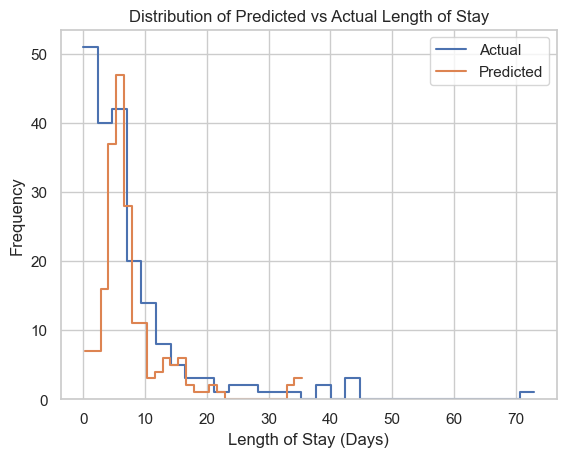

In [1046]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot actual values
sns.histplot(y_test[:200], bins='auto', fill=False, element="step", label='Actual')

# Plot predicted values
sns.histplot(xgb_y_pred[:200], bins='auto', fill=False, element="step", label='Predicted')


# Add axis labels and legend
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs Actual Length of Stay')
plt.legend()

# Show the plot
plt.show()


C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



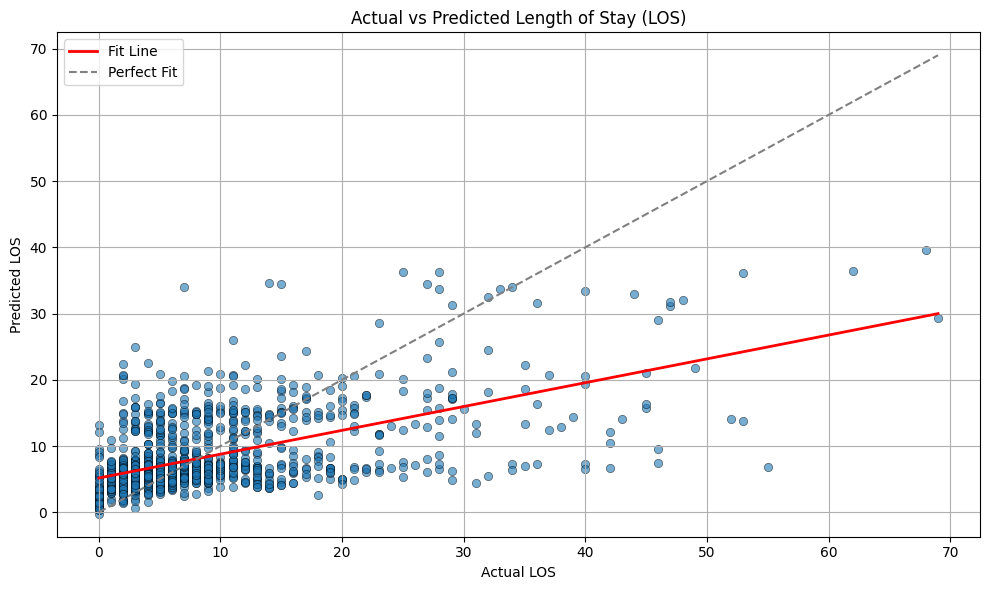

In [665]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Actual_LOS': y_test,
    'Predicted_LOS': xgb_y_pred
})

# Fit a linear regression line for visualization
reg = LinearRegression()
reg.fit(plot_df[['Actual_LOS']], plot_df['Predicted_LOS'])
line_x = np.linspace(plot_df['Actual_LOS'].min(), plot_df['Actual_LOS'].max(), 100)
line_y = reg.predict(line_x.reshape(-1, 1))

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='Actual_LOS', y='Predicted_LOS', alpha=0.6, edgecolor='k')
plt.plot(line_x, line_y, color='red', linewidth=2, label='Fit Line')

# Reference line for perfect prediction
plt.plot(line_x, line_x, color='gray', linestyle='--', label='Perfect Fit')

plt.title('Actual vs Predicted Length of Stay (LOS)')
plt.xlabel('Actual LOS')
plt.ylabel('Predicted LOS')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


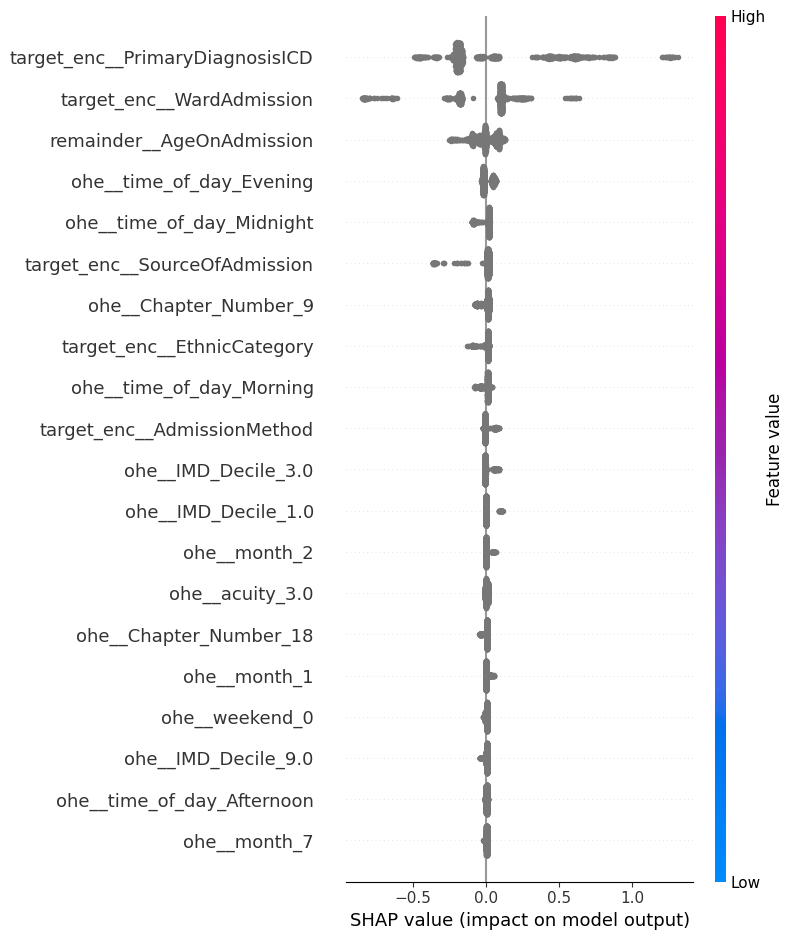

In [672]:
import shap

xgb_model = final_model.named_steps['model']
X_test_transformed = final_model.named_steps['preprocessor'].transform(X_test)

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_transformed)

feature_names = final_model.named_steps['preprocessor'].get_feature_names_out()
shap.summary_plot(shap_values, features=X_test_transformed, feature_names=feature_names)



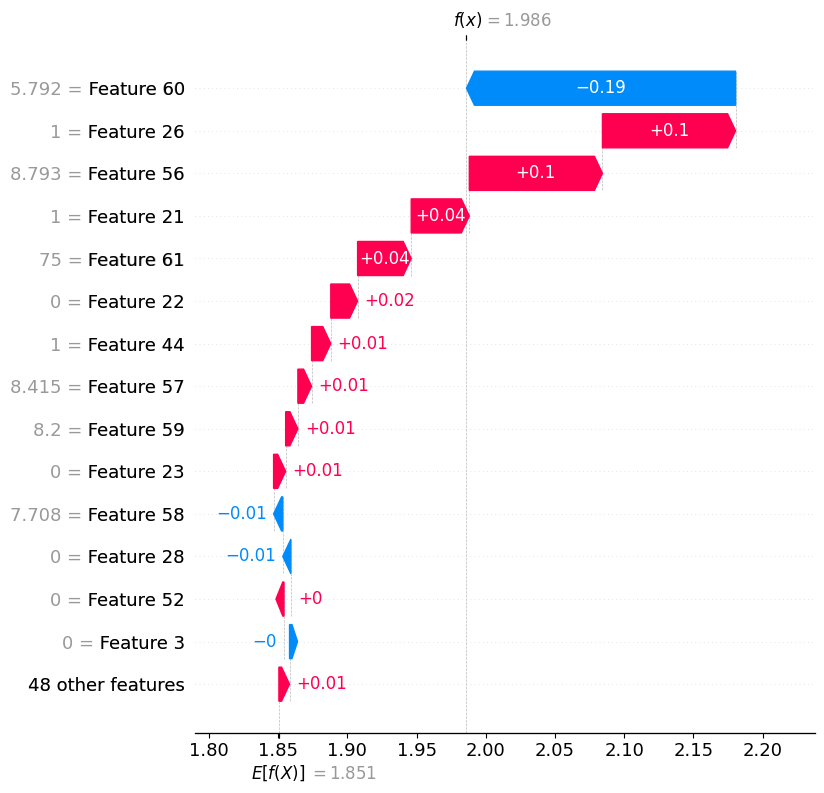

In [679]:
shap.plots.waterfall(shap_values[1], max_display=15)


RandomForestRegresssion

In [1047]:
rf_model_df = df_model_los.copy()

In [1048]:
# Impute acuity with mode (most common value)
rf_model_df['acuity'] = rf_model_df['acuity'].fillna(rf_model_df['acuity'].mode()[0])

# Impute EthnicCategory with a placeholder
rf_model_df['EthnicCategory'] = rf_model_df['EthnicCategory'].fillna(rf_model_df['EthnicCategory'].mode()[0])

In [1050]:
import optuna
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
X = rf_model_df.drop(columns='Los')
y = rf_model_df['Los']

#column distribution
numerical_cols = ['AgeOnAdmission']
low_card_cols = ['weekend', 'acuity', 'time_of_day',  'StartSexofPatientsCode']
target_enc_cols = ['month', 'WardAdmission', 'EthnicCategory', 'AdmissionMethod', 'SourceOfAdmission', 'PrimaryDiagnosisICD', 'Chapter_Number', 'IMD_Decile']

#Target encoding ICD code
for col in target_enc_cols:
    X[col] = rf_model_df.groupby(col)['Los'].transform('mean')


# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), low_card_cols)],
    remainder='passthrough'
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [687]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'random_state': 42,
    }


    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(**params))
    ])

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Use negative RMSE (since scoring must be maximized)
    scores = cross_val_score(rf_pipeline, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

    return -np.mean(scores)  # Flip sign to minimize RMSE

# Optuna study 
study_rf = optuna.create_study(direction='minimize') 
study_rf.optimize(objective, n_trials=20)

print('Best Trail Params', study_rf.best_trial.params)

[I 2025-08-26 12:39:08,782] A new study created in memory with name: no-name-6c2321e5-36d9-4342-867e-99cb91766c7f
[I 2025-08-26 12:39:12,591] Trial 0 finished with value: 8.142430575235126 and parameters: {'n_estimators': 150, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 8.142430575235126.
[I 2025-08-26 12:39:29,437] Trial 1 finished with value: 7.97219468742851 and parameters: {'n_estimators': 442, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 1 with value: 7.97219468742851.
[I 2025-08-26 12:40:07,233] Trial 2 finished with value: 7.953651938972328 and parameters: {'n_estimators': 940, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 2 with value: 7.953651938972328.
[I 2025-08-26 12:40:42,327] Trial 3 finished with value: 7.965155349396897 and parameters: {'n_estimators': 918, 'max_depth': 13, 'min_samples

In [1053]:
# Extract best parameters from Optuna
best_params_rf = study_rf.best_trial.params

# Final pipeline
rf_final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(**best_params_rf))
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use negative MAE (since scoring must be maximized)
scores = cross_val_score(rf_final_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print("Cross-validated MAE scores:", -scores)
print(f"Mean MAE score: {np.mean(-scores):.2f}")

Cross-validated MAE scores: [4.46169938 5.02330921 4.58127894 4.50098537 4.71546639]
Mean MAE score: 4.66


In [1065]:
# Fit on full training data
rf_final_model.fit(X_train, y_train)

# Predict on test set
rf_y_pred = rf_final_model.predict(X_test)

# Evaluate performance
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Final Test MAE: {rf_mae:.3f}")
print(f"Final Test RMSE: {rf_rmse:.3f}")
print(f"Final Test R² Score: {rf_r2:.4f}")

Final Test MAE: 4.666
Final Test RMSE: 7.514
Final Test R² Score: 0.3958


In [1084]:
print(f"Actual LOS mean: {y_test.mean():.2f}")
print(f"Predicted LOS mean: {rf_y_pred.mean():.2f}")

Actual LOS mean: 8.05
Predicted LOS mean: 8.08


In [1096]:
print(f"Actual LOS total days: {y_test.sum():.2f}")
print(f"Predicted LOS total days: {rf_y_pred.sum():.2f}")

Actual LOS total days: 10854.00
Predicted LOS total days: 10900.25


In [696]:
import optuna.visualization as vis

vis.plot_optimization_history(study_rf).show()
vis.plot_param_importances(study_rf).show()


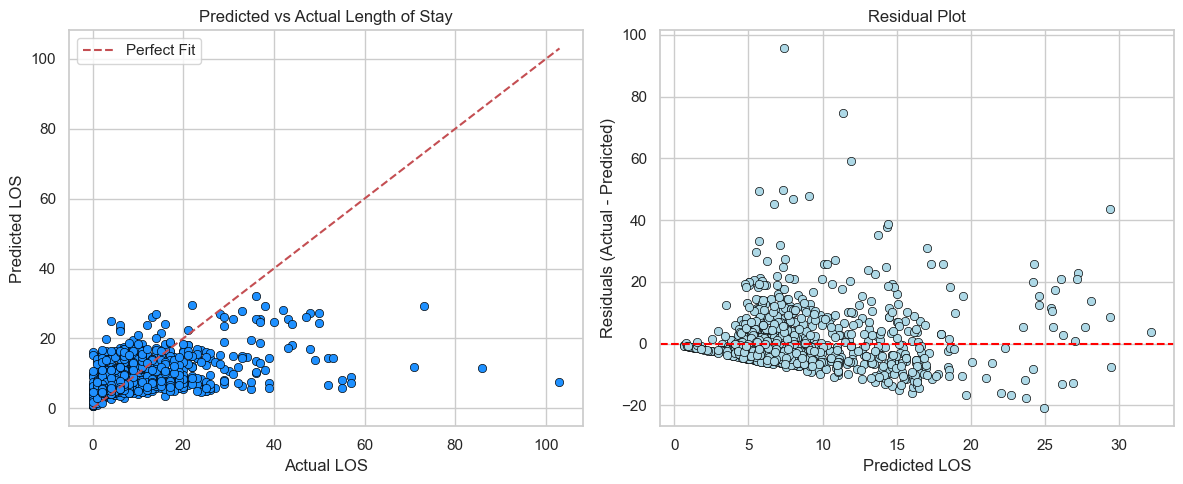

In [729]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - rf_y_pred

# Create horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
sns.set(style="whitegrid")

# Plot 1: Predicted vs Actual
sns.scatterplot(x=y_test, y=rf_y_pred, ax=axes[0], color='dodgerblue', edgecolor='black')
axes[0].set_xlabel("Actual LOS")
axes[0].set_ylabel("Predicted LOS")
axes[0].set_title("Predicted vs Actual Length of Stay")
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
axes[0].legend()

# Plot 2: Residual Plot
sns.scatterplot(x=rf_y_pred, y=residuals, ax=axes[1], color='lightblue', edgecolor='black')
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel("Predicted LOS")
axes[1].set_ylabel("Residuals (Actual - Predicted)")
axes[1].set_title("Residual Plot")

plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

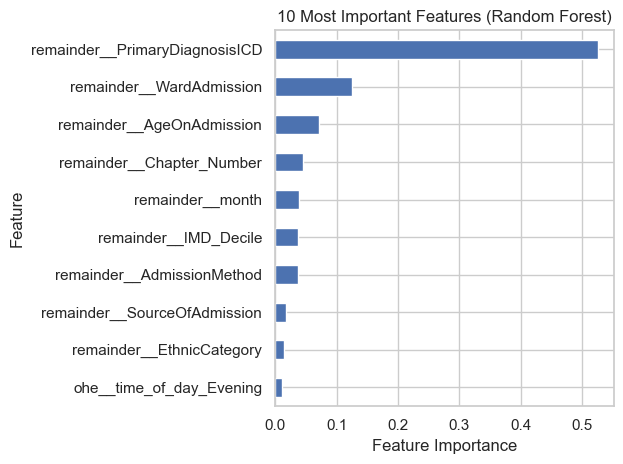

In [1093]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract and sort feature importances
importances = rf_final_model.named_steps['regressor'].feature_importances_
feature_names = rf_final_model.named_steps['preprocessor'].get_feature_names_out()

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_feats = feat_df.sort_values(by='Importance', ascending=False).head(10)

# Reverse the order so most important is at the top
top_feats = top_feats[::-1]

# Plot
plt.figure(figsize=(10, 8))
top_feats.plot.barh(x='Feature', y='Importance', legend=False)
plt.title('10 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Unseen Test Dataset form the Data Warehouse

In [1057]:
import pandas as pd
import sqlalchemy as sa

engine = sa.create_engine(open(r"S:\Data Science\sandboxes\Jawad\patient_LOS_project\SQL_query\connection_engine.txt").read())

with engine.connect() as conn:
   test_df = pd.read_sql(open(r"S:\Data Science\sandboxes\Jawad\patient_LOS_project\SQL_query\emergency_sql_queries\emerg_test_Los.sql").read(), con=conn.connection)

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_22924\4220699231.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [1076]:
test_df_unique = test_df.drop_duplicates(subset=['Los', 'AgeOnAdmission', 'PrimaryDiagnosisICD']).copy()

In [1077]:
test_df_unique['acuity'] = test_df_unique['acuity'].fillna(test_df_unique['acuity'].mode()[0])
test_df_unique['EthnicCategory'] = test_df_unique['EthnicCategory'].fillna(test_df_unique['EthnicCategory'].mode()[0])

In [1078]:
x_test_unseen = test_df_unique.drop(columns='Los')
y_test_unseen = test_df_unique['Los']

In [1079]:
high_cardinality_cols = ['month', 'WardAdmission', 'EthnicCategory', 'AdmissionMethod', 'SourceOfAdmission', 'PrimaryDiagnosisICD', 'Chapter_Number', 'IMD_Decile']

#Target encoding ICD code
for col in high_cardinality_cols:
    x_test_unseen[col] = test_df_unique.groupby(col)['Los'].transform('mean')

In [1080]:
LR_y_unseen_pred = LR_pipeline.predict(x_test_unseen)
XGB_y_unseen_pred = xgb_final_model.predict(x_test_unseen)
RF_y_unseen_pred = rf_final_model.predict(x_test_unseen)

In [1081]:
# Linear Regression Evaluate on Unseen data
LR_unseen_mae = mean_absolute_error(y_test_unseen, LR_y_unseen_pred)
LR_unseen_rmse = np.sqrt(mean_squared_error(y_test_unseen, LR_y_unseen_pred))
LR_unseen_r2 = r2_score(y_test_unseen, LR_y_unseen_pred)

# XGBoost Evaluate on Unseen data
XGB_unseen_mae = mean_absolute_error(y_test_unseen, XGB_y_unseen_pred)
XGB_unseen_rmse = np.sqrt(mean_squared_error(y_test_unseen, XGB_y_unseen_pred))
XGB_unseen_r2 = r2_score(y_test_unseen, XGB_y_unseen_pred)

#Random Forest Evaluate on testing data
RF_unseen_mae = mean_absolute_error(y_test_unseen, RF_y_unseen_pred)
RF_unseen_rmse = np.sqrt(mean_squared_error(y_test_unseen, RF_y_unseen_pred))
RF_unseen_r2 = r2_score(y_test_unseen, RF_y_unseen_pred)


print("\nModel: LR  | XGB  | RF \n")
print(f"MAE: {LR_unseen_mae:.2f}  | {XGB_unseen_mae:.2f} | {RF_unseen_mae:.2f}")
print(f"RMSE: {LR_unseen_rmse:.2f} | {XGB_unseen_rmse:.2f} | {XGB_unseen_rmse:.2f}")
print(f"R²: {LR_unseen_r2:.2f}   | {XGB_unseen_r2:.2f}| {XGB_unseen_r2:.2f}")


Model: LR  | XGB  | RF 

MAE: 3.90  | 3.95 | 4.41
RMSE: 6.36 | 6.88 | 6.88
R²: 0.57   | 0.50| 0.50


In [1100]:
print(f"Actual LOS mean: {y_test_unseen.mean():.2f}")
print(f"LR Predicted LOS mean: {LR_y_unseen_pred.mean():.2f}")
print(f"XGB Predicted LOS mean: {XGB_y_unseen_pred.mean():.2f}")
print(f"RF Predicted LOS mean: {RF_y_unseen_pred.mean():.2f}")

Actual LOS mean: 7.87
LR Predicted LOS mean: 7.07
XGB Predicted LOS mean: 7.51
RF Predicted LOS mean: 8.01


In [1099]:
print(f"Actual LOS total days:: {y_test_unseen.sum():.2f}")
print(f"LR Predicted total days:: {LR_y_unseen_pred.sum():.2f}")
print(f"XGB Predicted total days:: {XGB_y_unseen_pred.sum():.2f}")
print(f"RF Predicted total days:: {RF_y_unseen_pred.sum():.2f}")

Actual LOS total days:: 4508.00
LR Predicted total days:: 4052.38
XGB Predicted total days:: 4303.40
RF Predicted total days:: 4588.83
